# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

In [1]:
!unrar x /content/documents.rar

Streaming output truncated to the last 5000 lines.
Extracting  documents/sci.space_60893.txt                                 66%  OK 
Extracting  documents/sci.space_60894.txt                                 66%  OK 
Extracting  documents/sci.space_60895.txt                                 66%  OK 
Extracting  documents/sci.space_60896.txt                                 66%  OK 
Extracting  documents/sci.space_60897.txt                                 66%  OK 
Extracting  documents/sci.space_60898.txt                                 66%  OK 
Extracting  documents/sci.space_60899.txt                                 66%  OK 
Extracting  documents/sci.space_60900.txt                                 66%  OK 
Extracting  documents/sci.space_60901.txt                                 66%  OK 
Extracting  documents/sci.space_60902.txt                                 66%  OK 
Extracting  documents/sci.spa

In [2]:
from os import listdir
from os.path import isfile, join
import string
import nltk
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import HDFStore,DataFrame
from pandas import read_hdf
import os

In [3]:
my_path = 'documents'
#creating a list of folder names to make valid pathnames later
if not os.path.isfile('/content/file_name.csv'):
  files_name_list = [f for f in listdir(my_path)]
  file_name_df=pd.DataFrame(files_name_list)
  file_name_df.to_csv('file_name.csv',index=False)
else:
  print('here')
  files_name_list=pd.read_csv('file_name.csv').values.reshape(-1,)

here


In [4]:
all_labels = [str(f).split('_')[0] for f in list(files_name_list)]
len(all_labels)

18828

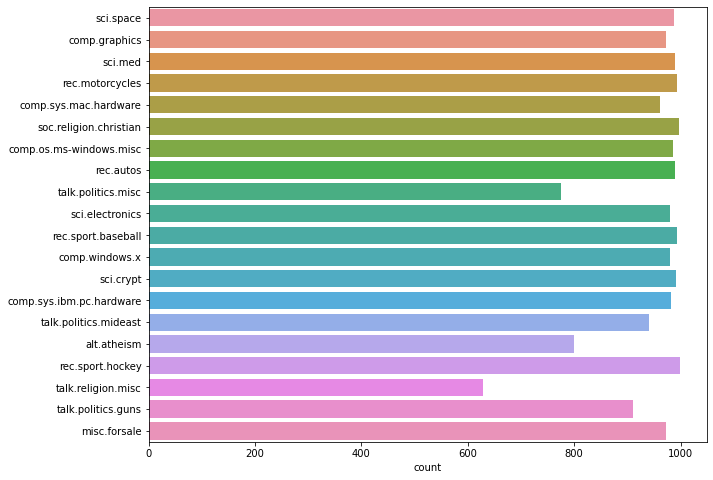

In [5]:
### count plot of all the class labels. 
plt.figure(figsize=(10,8))
sns.countplot(y=all_labels)
plt.show()

In [6]:
### count plot of all the class labels. 

In [7]:
file_name=[]
file_text=[]
for i in list(files_name_list):
  f = open('documents/'+i, "r",encoding='cp1252')
  file_text.append(f.read())
  file_name.append(i)
  f.close()

In [8]:
data=pd.DataFrame({'file_name':file_name,'file_text':file_text})

In [9]:
data['class']=all_labels

In [10]:
data.shape

(18828, 3)

In [11]:
data.head()

,file_name,file_text,class
0,sci.space_61123.txt,From: higgins@fnalf.fnal.gov (Bill Higgins-- B...,sci.space
1,comp.graphics_38380.txt,From: Peter.vanderveen@visser.el.wau.nl (Pete...,comp.graphics
2,sci.med_59201.txt,From: jkjec@westminster.ac.uk (Shazad Barlas)\...,sci.med
3,rec.motorcycles_105215.txt,From: infante@acpub.duke.edu (Andrew Infante)...,rec.motorcycles
4,comp.sys.mac.hardware_51620.txt,From: tthiel@cs.uiuc.edu (Terry Thiel)\nSubjec...,comp.sys.mac.hardware


In [12]:
labels_dict={}
for i,j in enumerate(sorted(list(set(all_labels)))):
  labels_dict[j]=i
labels_dict

{'alt.atheism': 0,
 'comp.graphics': 1,
 'comp.os.ms-windows.misc': 2,
 'comp.sys.ibm.pc.hardware': 3,
 'comp.sys.mac.hardware': 4,
 'comp.windows.x': 5,
 'misc.forsale': 6,
 'rec.autos': 7,
 'rec.motorcycles': 8,
 'rec.sport.baseball': 9,
 'rec.sport.hockey': 10,
 'sci.crypt': 11,
 'sci.electronics': 12,
 'sci.med': 13,
 'sci.space': 14,
 'soc.religion.christian': 15,
 'talk.politics.guns': 16,
 'talk.politics.mideast': 17,
 'talk.politics.misc': 18,
 'talk.religion.misc': 19}

In [13]:
data['labels']=data['class'].map(labels_dict)
data.labels

0        14
1         1
2        13
3         8
4         4
         ..
18823     4
18824    17
18825     4
18826     8
18827    19
Name: labels, Length: 18828, dtype: int64

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [14]:
def get_preprocess_email(string_input):
  #Step 1:
  ##We will start by getting all the email in a document and storing those in a list match. Each document will be sent as string_input in the method
  match = re.findall(r'[\w\.-]+@[\w\.-]+', string_input)
  new_data= string_input
  new_match=[]
  ##We will now iterate through each email stored in the list match
  for i in match:
    #Remove the email from the actual document string text
    new_data=new_data.replace(i,'')
    #We will remove the word com from each mail
    i=i.replace('com','')
    i=i.replace('COM','')
    ##We will first make a split on @ then take the words after @ then split the word on . and extend that on the list new_match
    new_match.extend(i.split('@')[1].split('.'))

  #In the final list we will be saving all the email which have a length greater than 2
  final_list=[]
  for i in new_match:
    if(len(i)>2):
      final_list.append(i)
  #Step 2.Replace all the emails by space in the original text. 
  final_email=' '.join(final_list)
  final_email = str(final_email)
  #Here
  return final_email,new_data

In [15]:
input_string="""Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?"""

In [16]:
get_preprocess_email(input_string)

('nyx edu mimsy umd edu umd edu',
 'Subject: A word of advice\nFrom:  (The One and Only)\n\nIn article <  >  (Charley Wingate) writes:\n>\n>I\'ve said 100 times that there is no "alternative" that should think you\n>might have caught on by now.  And there is no "alternative", but the point\n>is, "rationality" isn\'t an alternative either.  The problems of metaphysical\n>and religious knowledge are unsolvable-- or I should say, humans cannot\n>solve them.\n\nHow does that saying go: Those who say it can\'t be done shouldn\'t interrupt\nthose who are doing it.\n\nJim\n--\nHave you washed your brain today?')

In [17]:
# we have collected all emails and preprocessed them, this is sample output
#preprocessed_email

In [18]:
#len(preprocessed_email)

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [19]:
##The method to define decontraction have been taken from the text preprocessing of the Donor Choose dataset provided by AAIC
##In this method we are using regular expression to substitue all the contracted phrase. 
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [20]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [21]:
# #i am living in the New York
# print("i am living in the New York -->", list(chunks))
# print(" ")
# print("-"*50)
# print(" ")
# #My name is Srikanth Varma
# print("My name is Srikanth Varma -->", list(chunks1))

<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [22]:
##All the steps provided from the Step 3 to Step 18 is implemented in the below method which will  return the preprocessed email, subject and text
##These are all documented in the script along with the steps number.
def get_processed_email_subject_and_text(string_input):
  ##First we will get the preprocessed email from the get_preprocess_email method defined earlier so that we not have to call the method
  ##explicitly everytime.
  processed_email=get_preprocess_email(string_input)[0]
  ##Also we will get the first level of preprocessing done on the get_preprocess_email so that we can proceed with the further preprocessing
  string_output=get_preprocess_email(string_input)[1]

  #3. Get subject of the text i.e. get the total lines where "Subject:" occur and remove the word which are before the ":" remove the newlines, 
  #tabs, punctuations, any special chars.
  subject_text=re.search('Subject: (.*)', string_output).group(1)
  #4. After you store it in the list, Replace those sentances in original text by space.
  string_output=string_output.replace(subject_text,'')
  subject_text=subject_text.replace('Re:','')
  subject_text=re.sub('\s+',' ',subject_text)
  subject_text=re.sub('[!,*)>@#%--:"<(&$_?.^]', '', subject_text).strip()
  subject_text=str(subject_text)
  
  #5. Delete all the sentances where sentence starts with "Write to:" or "From:".
  #Removing words  ===> Subject:, Write To: and From:
  string_output=string_output.replace('Subject:','').replace('Write To:','').replace('From:','')
  #6,7. Removing the words between brackets
  #Removing words between brackets
  string_output=re.sub(r'\([^()]*\)', '', string_output)
  #Step 10.Decontraction
  string_output=decontracted(string_output)
  #9. Remove all the words which ends with ":".
  #Removing the words before  ":"
  arrays=string_output.split(':')
  for i in arrays:
    string_output=string_output.replace(i.split(' ')[-1],'')
  #8. Remove all the newlines('\n'), tabs('\t'), "-", "\".
  #Removing new line and other special characters
  string_output=re.sub('\s+',' ',string_output)
  string_output=re.sub('[!,*@#%--:"&$?.^<>/]', '', string_output).strip()

  #11. Chunking: We will move into the entity recognition loop/tree and inside the tree if we find there is a PERSON we will remove that word/
  #group of words
  #We will also take care of the below points while chunking
  #14. After doing above points, we observed there might be few word's like
  #15.  We also observed some words like  "OneLetter_word"- eg: d_berlin, 
  #Now we will do chunking. Before doing chunking we have also removed all the _ so that the ongoing _ will be only of chunking data now.
  new_output=[]
  words=nltk.word_tokenize(string_output)
  pos_tags = nltk.pos_tag(words)
  chunks = nltk.ne_chunk(pos_tags, binary=False)
  for chunk in chunks:
    if (hasattr(chunk,'label')):
      entity='_'.join(c[0] for c in chunk if len(c[0])>2).strip('_')
      
      if (chunk.label()=='PERSON'):
        pass
      else:
        new_output.append(entity)
    else:
      new_output.append(chunk[0])
  new_output = ' '.join(new_output)

  #13. Replace all the digits with space i.e delete all the digits. 
  new_output = re.sub("\d+", "", new_output)
  
  #17. replace all the words except "A-Za-z_" with space. 
  new_output= re.sub(r"[^a-zA-Z_]+", ' ', new_output)
  ###Remove extra spaces in the text.
  new_output = (' ').join(new_output.split())
  #16. Convert all the words into lower case and lowe case and remove the words which are greater than or equal to 15 or less than or equal to 2.
  new_output=new_output.lower()
  new_output = ' '.join([str(i) for i in new_output.split(" ") if (len(i)>2 and len(i)<15)])
  new_output = str(new_output)
  return subject_text,new_output,processed_email

In [23]:
#get_processed_email_and_subject(data.file_text[2201])[1]

In [24]:
file_to_check = open('documents/'+'alt.atheism_49960.txt', "r",encoding='cp1252')
string_to_check=file_to_check.read()
#####Verify the subject
print('The subject is:=====>')
get_processed_email_subject_and_text(string_to_check)[0]

The subject is:=====>


'AltAtheism FAQ Atheist Resources'

In [25]:
print('The preprocessed text is:')
get_processed_email_subject_and_text(string_to_check)[1]

The preprocessed text is:


'mathew december usa freedom from religion foundation bumper stickers and assted other athet paraphernalia are available from the the write ffrf box evolution designs evolution designs sell the darwin symbol like the ones chrtians stick their cars but with feet and the written inside the deluxe moulded plastic postpaid the write evolution designs nth hollywood people the area can get from try mailing net people who directly the price per american atheist press aap publh various athet books critiques the bible lts biblical contradictions and one such book the bible_handbook ball and american_athet press isbn edition bible contradictions absurdities atrocities immalities contains ball the aap based the king version the press box prometheus books_sell books including write east amherst street alternate address prometheus books for humanism ganization promoting black secular humanm and uncovering the hry black freethought they publh quarterly newsletter aah examiner write allen african ame

In [26]:
print('The preprocessed email is:')
get_processed_email_subject_and_text(string_to_check)[2]

The preprocessed email is:


'mantis net mantis'

In [27]:
data.columns

Index(['file_name', 'file_text', 'class', 'labels'], dtype='object')

In [28]:
data.iloc[400]

file_name                           rec.motorcycles_105236.txt
file_text    From: parr@acs.ucalgary.ca (Charles Parr)\nSub...
class                                          rec.motorcycles
labels                                                       8
Name: 400, dtype: object

### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [29]:
# def preprocess(Input_Text):
#     """Do all the Preprocessing as shown above and
#     return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
#     list_of_preproessed_emails=get_processed_email_subject_and_text(Input_Text)[2]
#     subject=get_processed_email_subject_and_text(Input_Text)[0]
#     text=get_processed_email_subject_and_text(Input_Text)[1]
#     return (list_of_preproessed_emails,subject,text)

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

In [30]:
# preprocess(string_to_check)

In [31]:
data.head()

,file_name,file_text,class,labels
0,sci.space_61123.txt,From: higgins@fnalf.fnal.gov (Bill Higgins-- B...,sci.space,14
1,comp.graphics_38380.txt,From: Peter.vanderveen@visser.el.wau.nl (Pete...,comp.graphics,1
2,sci.med_59201.txt,From: jkjec@westminster.ac.uk (Shazad Barlas)\...,sci.med,13
3,rec.motorcycles_105215.txt,From: infante@acpub.duke.edu (Andrew Infante)...,rec.motorcycles,8
4,comp.sys.mac.hardware_51620.txt,From: tthiel@cs.uiuc.edu (Terry Thiel)\nSubjec...,comp.sys.mac.hardware,4


In [32]:
%%time
if not os.path.isfile('/content/processed_data.csv'):
  processed_data = pd.DataFrame()
  processed_data['preprocessed_text'] = data['file_text'].apply(lambda x:get_processed_email_subject_and_text(x)[1])
  processed_data['preprocessed_subject'] = data['file_text'].apply(lambda x:get_processed_email_subject_and_text(x)[0])
  processed_data['preprocessed_emails'] = data['file_text'].apply(lambda x:get_processed_email_subject_and_text(x)[2])
  processed_data.to_csv('/content/processed_data.csv',index=False)
#data.columns

CPU times: user 33 µs, sys: 6 µs, total: 39 µs
Wall time: 34.3 µs


In [33]:
preprocessed_tuple = pd.read_csv('/content/processed_data.csv')

In [34]:
preprocessed_tuple.shape

(18828, 3)

In [35]:
trb_nan_idx = preprocessed_tuple[pd.isnull(preprocessed_tuple['preprocessed_subject'])].index.tolist()
preprocessed_tuple.loc[trb_nan_idx, 'preprocessed_subject'] = ' '

trb_nan_idx = preprocessed_tuple[pd.isnull(preprocessed_tuple['preprocessed_text'])].index.tolist()
preprocessed_tuple.loc[trb_nan_idx, 'preprocessed_text'] = ' '

trb_nan_idx = preprocessed_tuple[pd.isnull(preprocessed_tuple['preprocessed_emails'])].index.tolist()
preprocessed_tuple.loc[trb_nan_idx, 'preprocessed_emails'] = ' '


### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

In [36]:
###Now we will start by concatenating the preprocessed text, subject and email columns
X_data = (preprocessed_tuple['preprocessed_emails'])+' '+(preprocessed_tuple['preprocessed_subject'])+' '+(preprocessed_tuple['preprocessed_text']).values

In [37]:
y_data = data['labels']

In [38]:
#Now we will now tokenize the text data. However we have taken out '_' on filters parameter
from tensorflow.keras.preprocessing.text import Tokenizer
token = Tokenizer(num_words=50000,filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
token.fit_on_texts(X_data)

In [39]:
#We will get the vobabulary size of the text data
vocab_size=len(token.word_index)+1
print('The vocabulary size is: ',vocab_size)

The vocabulary size is:  139085


In [40]:
#Now we we will convert the text to sequence
lst=[]
for i in X_data:
  lst.append(len(i.split(' ')))
#Get the sentence with maximum length
print('The sentence with maximum length is:')
print(max(np.array(lst)))
#Get the sentence with minimum length
print('The sentence with minimum length is:')
print(min(np.array(lst)))
#Get the 95-99 percentile
for i in range(95,100):
  print('The length of the word within {} %ile is:'.format(i))
  print(np.percentile(lst,i))
#Get the 98-99 percentile of length
for i in np.arange(98,99,0.1):
  print('The length of the word within {} %ile is:'.format(i))
  print(np.percentile(lst,i))

The sentence with maximum length is:
8203
The sentence with minimum length is:
4
The length of the word within 95 %ile is:
491.0
The length of the word within 96 %ile is:
552.9199999999983
The length of the word within 97 %ile is:
665.0
The length of the word within 98 %ile is:
860.0
The length of the word within 99 %ile is:
1284.3799999999974
The length of the word within 98.0 %ile is:
860.0
The length of the word within 98.1 %ile is:
897.148000000001
The length of the word within 98.19999999999999 %ile is:
919.0
The length of the word within 98.29999999999998 %ile is:
948.9409999999989
The length of the word within 98.39999999999998 %ile is:
992.5359999999928
The length of the word within 98.49999999999997 %ile is:
1028.1899999999878
The length of the word within 98.59999999999997 %ile is:
1062.421999999995
The length of the word within 98.69999999999996 %ile is:
1102.497999999985
The length of the word within 98.79999999999995 %ile is:
1168.15199999998
The length of the word within 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


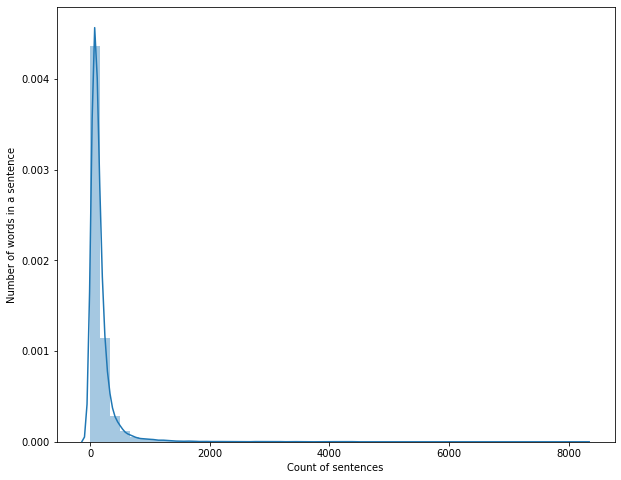

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.xlabel('Count of sentences')
plt.ylabel('Number of words in a sentence')
sns.distplot(lst)
plt.show()

From the analysis and the distribution plot above we can see that around 98.5% of the input text have length less than 1000 and also the distribution are skewed towards right. So we choose the sequence count to be 1000

In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
encoded_text = token.texts_to_sequences(X_data)
#word_index = token.word_index
sequence_length=max(np.array(lst))
X=pad_sequences(encoded_text, maxlen=sequence_length,padding='post')
y = to_categorical(np.asarray(y_data))
print(X.shape)
print(y.shape)

(18828, 8203)
(18828, 20)


In [43]:
!wget http://nlp.stanford.edu/data/glove.6B.zip - 'glove.6B.zip'
!unzip glove*.zip

--2020-11-13 08:56:30--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-11-13 08:56:30--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-11-13 08:56:30--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [44]:
%%time
glove_vectors=dict()
file_g_v=open('/content/glove.6B.300d.txt', encoding='utf=8')
for line in file_g_v:
  values=line.split()
  word=values[0]
  vectors=np.asarray(values[1:])
  glove_vectors[word]=vectors
file_g_v.close()

CPU times: user 20.2 s, sys: 2.34 s, total: 22.5 s
Wall time: 22.5 s


In [45]:
len(glove_vectors.keys())

400000

In [46]:
word_vector_matrix = np.zeros((vocab_size,300))
count=0
none_count=0
for word, index in token.word_index.items():
  vector=glove_vectors.get(word)
  if vector is not None:
    word_vector_matrix[index]=vectors
    count+=1
  else:
    none_count+=1
word_vector_matrix.shape

(139085, 300)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.25, stratify=y)

In [48]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input, Reshape, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import tensorflow as tf
# model = Sequential()
# model.add(Embedding(vocab_size,300,weights=[word_vector_matrix],input_length=1000,trainable=False))
# model.add(Conv1D(64,8, activation='relu'))
# model.add(MaxPooling1D(2))
# model.add(Dropout(0.5))

# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(16, activation='relu'))
# model.add(Flatten())

# model.add(Dense(20, activation='sigmoid'))

# model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
# model.fit(X_train,y_train,steps_per_epoch=500,epochs=10,validation_data=(X_test,y_test))
embedding_layer = Embedding(vocab_size, 300,
                            weights=[word_vector_matrix], 
                            input_length=sequence_length, 
                            trainable=False)

sequence_input = Input(shape=(sequence_length,), dtype='int32') 
embedded_sequences = embedding_layer(sequence_input) 
Conv1 = Conv1D(filters=4,kernel_size=(3),strides=(2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=0),name='Conv1')\
              (embedded_sequences)
Conv2 = Conv1D(filters=4,kernel_size=(3),strides=(2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=0),name='Conv2')\
              (embedded_sequences)
Conv3 = Conv1D(filters=4,kernel_size=(3),strides=(2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=0),name='Conv3')\
              (embedded_sequences)
concatenated_tensor = Concatenate(axis=1)([Conv1, Conv2, Conv3])

Pool1 = MaxPool1D(pool_size=(2),strides=(2),padding='valid',data_format='channels_last',name='Pool1')\
        (concatenated_tensor)

Conv4 = Conv1D(filters=4,kernel_size=(3),strides=(1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=0),name='Conv4')\
              (Pool1)
Conv5 = Conv1D(filters=4,kernel_size=(3),strides=(1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=0),name='Conv5')\
              (Pool1)
Conv6 = Conv1D(filters=4,kernel_size=(3),strides=(1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=0),name='Conv6')\
              (Pool1)
concatenated_tensor = Concatenate(axis=1)([Conv4, Conv5, Conv5])

Pool2 = MaxPool1D(pool_size=(2),strides=(2),padding='valid',data_format='channels_last',name='Pool2')\
        (concatenated_tensor)
Conv7 = Conv1D(filters=8,kernel_size=(3),strides=(1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=0),name='Conv6')\
              (Pool2)

flatten = Flatten(data_format='channels_last',name='Flatten')(Pool2)

flatten = Dropout(0.5)(flatten)

FC1 = Dense(units=32,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=32),\
            name='FC1')(flatten)
# FC2 = Dense(units=64,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=32),\
#             name='FC2')(FC1)
# FC3 = Dense(units=32,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=32),\
#             name='FC3')(FC2)

preds = Dense(20, activation='softmax')(FC1)

model = Model(sequence_input, preds)

#checkpoint = ModelCheckpoint('weights_cnn_sentece.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = Adam(lr=0.01)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8203)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 8203, 300)    41725500    input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv1D)                  (None, 4101, 4)      3604        embedding[0][0]                  
__________________________________________________________________________________________________
Conv2 (Conv1D)                  (None, 4101, 4)      3604        embedding[0][0]                  
_______________________________________________________________________________________

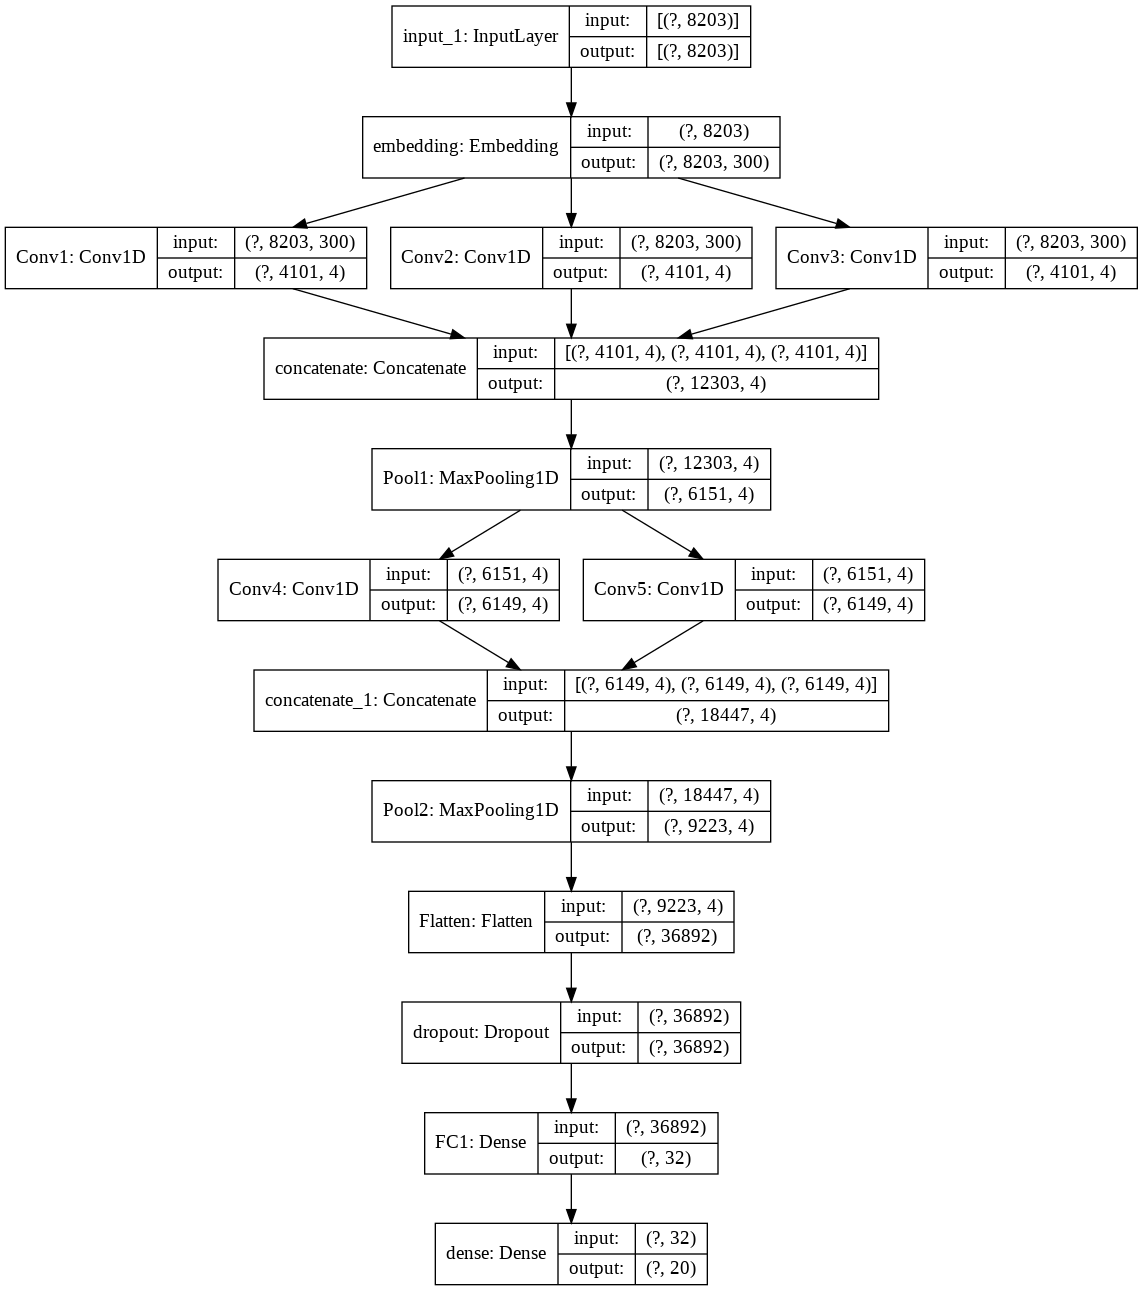

In [49]:
#model =Model(inputs=[sequence_input], outputs=[preds])
import tensorflow as tf
dot_img_file = './model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),steps_per_epoch=20,epochs=10,validation_steps=5)

Epoch 1/10


<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>